# Visualization of vehicle fuel economy data

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


# Dataset

- make: maker
- model:
- trans: transmission type and number of gears 
- cylinders: mub
- displ: displacement in liters 
- pv2: passenger interior volume of  a 2-door version
- pv4: passenger interior volume of a 4-door version
- drive: 2-wheel, 4 wheel or all wheel
- city: estimated city mpg (miles/gallon); mpg when driving in city
- UCity: unadjusted city mpg
- UHighway: estimated highway mpg; mpg when driving in highway
- comb: esimated combined city and highway CO2 emission in grams per mile
- co2: CO2 emmission (grams) per mile
- ghgScore: greenhouse gas score



In [ ]:
# Categorical variables: make, VClass(ordinal), drive, trans, fuelType, cylinders, 
# Numerical variables: displ, pv2, pv4, city, Ucity, highway, UHighway, comb, co2, feScore, ghgScore



In [4]:
fuel = pd.read_csv('fuel_econ.csv')
fuel.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [46]:
fuel.info() 
fuel.shape

# no missing values in this data,
# consider chaging variables into categorical, e.g. VClass(ordinal), fuelType

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3929 non-null   int64  
 1   make       3929 non-null   object 
 2   model      3929 non-null   object 
 3   year       3929 non-null   int64  
 4   VClass     3929 non-null   object 
 5   drive      3929 non-null   object 
 6   trans      3929 non-null   object 
 7   fuelType   3929 non-null   object 
 8   cylinders  3929 non-null   int64  
 9   displ      3929 non-null   float64
 10  pv2        3929 non-null   int64  
 11  pv4        3929 non-null   int64  
 12  city       3929 non-null   float64
 13  UCity      3929 non-null   float64
 14  highway    3929 non-null   float64
 15  UHighway   3929 non-null   float64
 16  comb       3929 non-null   float64
 17  co2        3929 non-null   int64  
 18  feScore    3929 non-null   int64  
 19  ghgScore   3929 non-null   int64  
dtypes: float

(3929, 20)

In [45]:
fuel[["VClass", "fuelType", "drive", "trans", ]].apply(lambda x: x.astype('category'))


,VClass,fuelType,drive,trans
0,Subcompact Cars,Premium Gasoline,All-Wheel Drive,Automatic (AM6)
1,Compact Cars,Premium Gasoline,Front-Wheel Drive,Automatic (AM-S6)
2,Compact Cars,Premium Gasoline,Front-Wheel Drive,Automatic (S6)
3,Compact Cars,Premium Gasoline,All-Wheel Drive,Automatic (S6)
4,Midsize Cars,Regular Gasoline,Front-Wheel Drive,Automatic (S6)
...,...,...,...,...
3924,Midsize Cars,Regular Gasoline,Front-Wheel Drive,Automatic (variable gear ratios)
3925,Midsize Cars,Regular Gasoline,Front-Wheel Drive,Automatic (AM6)
3926,Midsize Cars,Regular Gasoline,Front-Wheel Drive,Automatic (AM6)
3927,Midsize Cars,Premium Gasoline,Rear-Wheel Drive,Automatic (S10)


In [54]:
# cast the VClass variable to ordered categorical datatype
vclass_order = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vs_dtype = pd.api.types.CategoricalDtype(
    categories=vclass_order, ordered=True)
fuel["VClass"] = fuel["VClass"].astype(vs_dtype) 

fuel["fuelType"] = fuel["fuelType"].astype('category')
fuel["drive"] = fuel["drive"].astype('category')
fuel["trans"] = fuel["trans"].astype('category')

fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         3929 non-null   int64   
 1   make       3929 non-null   object  
 2   model      3929 non-null   object  
 3   year       3929 non-null   int64   
 4   VClass     3929 non-null   category
 5   drive      3929 non-null   category
 6   trans      3929 non-null   category
 7   fuelType   3929 non-null   category
 8   cylinders  3929 non-null   int64   
 9   displ      3929 non-null   float64 
 10  pv2        3929 non-null   int64   
 11  pv4        3929 non-null   int64   
 12  city       3929 non-null   float64 
 13  UCity      3929 non-null   float64 
 14  highway    3929 non-null   float64 
 15  UHighway   3929 non-null   float64 
 16  comb       3929 non-null   float64 
 17  co2        3929 non-null   int64   
 18  feScore    3929 non-null   int64   
 19  ghgScore   3929 non-null   

In [6]:
fuel.describe()

,id,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
count,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000
mean,36006.724357,2015.500891,5.468313,2.950573,23.660982,59.239247,21.830462,28.044011,29.973842,42.850295,24.791339,376.564266,5.668872,5.659201
std,2189.349923,1.694775,1.878319,1.305901,37.724901,48.667549,6.246273,9.087195,5.747571,9.100423,6.003246,92.338892,1.755860,1.754589
min,32204.000000,2013.000000,2.000000,0.600000,0.000000,0.000000,10.540200,12.900000,16.559400,21.800000,12.821700,29.000000,1.000000,1.000000
25%,34087.000000,2014.000000,4.000000,2.000000,0.000000,0.000000,17.746900,22.200000,25.754200,36.000000,20.658100,315.000000,5.000000,5.000000
50%,36020.000000,2015.000000,5.000000,2.500000,0.000000,91.000000,20.823200,26.400000,29.633800,42.200000,24.000000,369.000000,5.000000,5.000000
75%,37935.000000,2017.000000,6.000000,3.600000,70.000000,100.000000,24.981400,32.264800,33.773100,48.900000,28.227100,429.000000,7.000000,7.000000
max,39901.000000,2018.000000,12.000000,7.000000,102.000000,127.000000,57.808800,83.559800,59.416900,79.100000,57.782400,692.000000,10.000000,10.000000


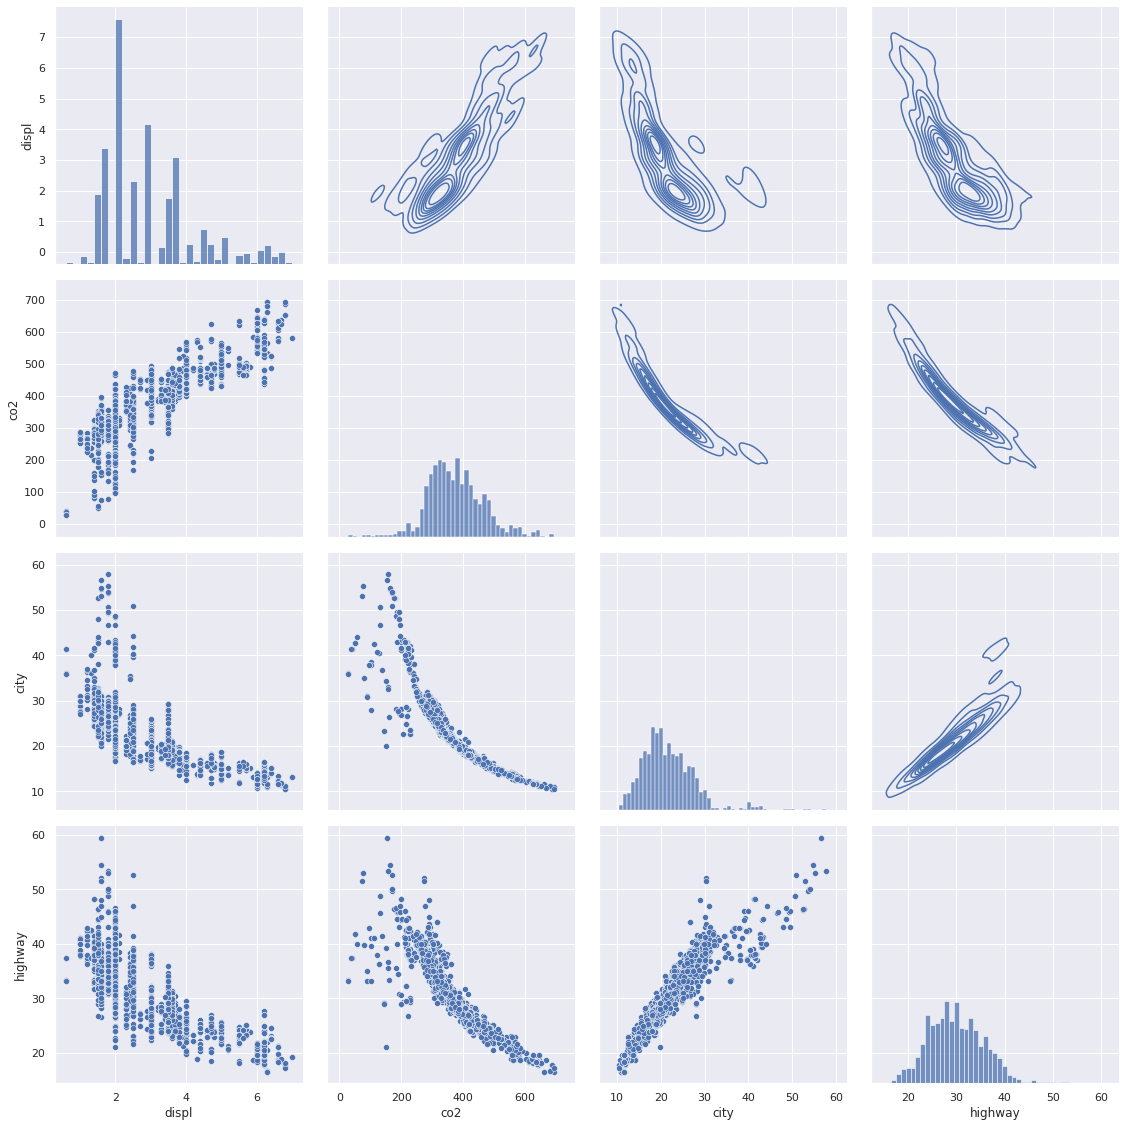

In [31]:
# Scatter plots between displ, co2, city, highway
# they are symmetric to the diagnal of the matrix

sns.set(rc={"figure.figsize":(15, 15)}) 
g = sns.PairGrid(fuel[['displ', 'co2', 'city', 'highway']], height = 4)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

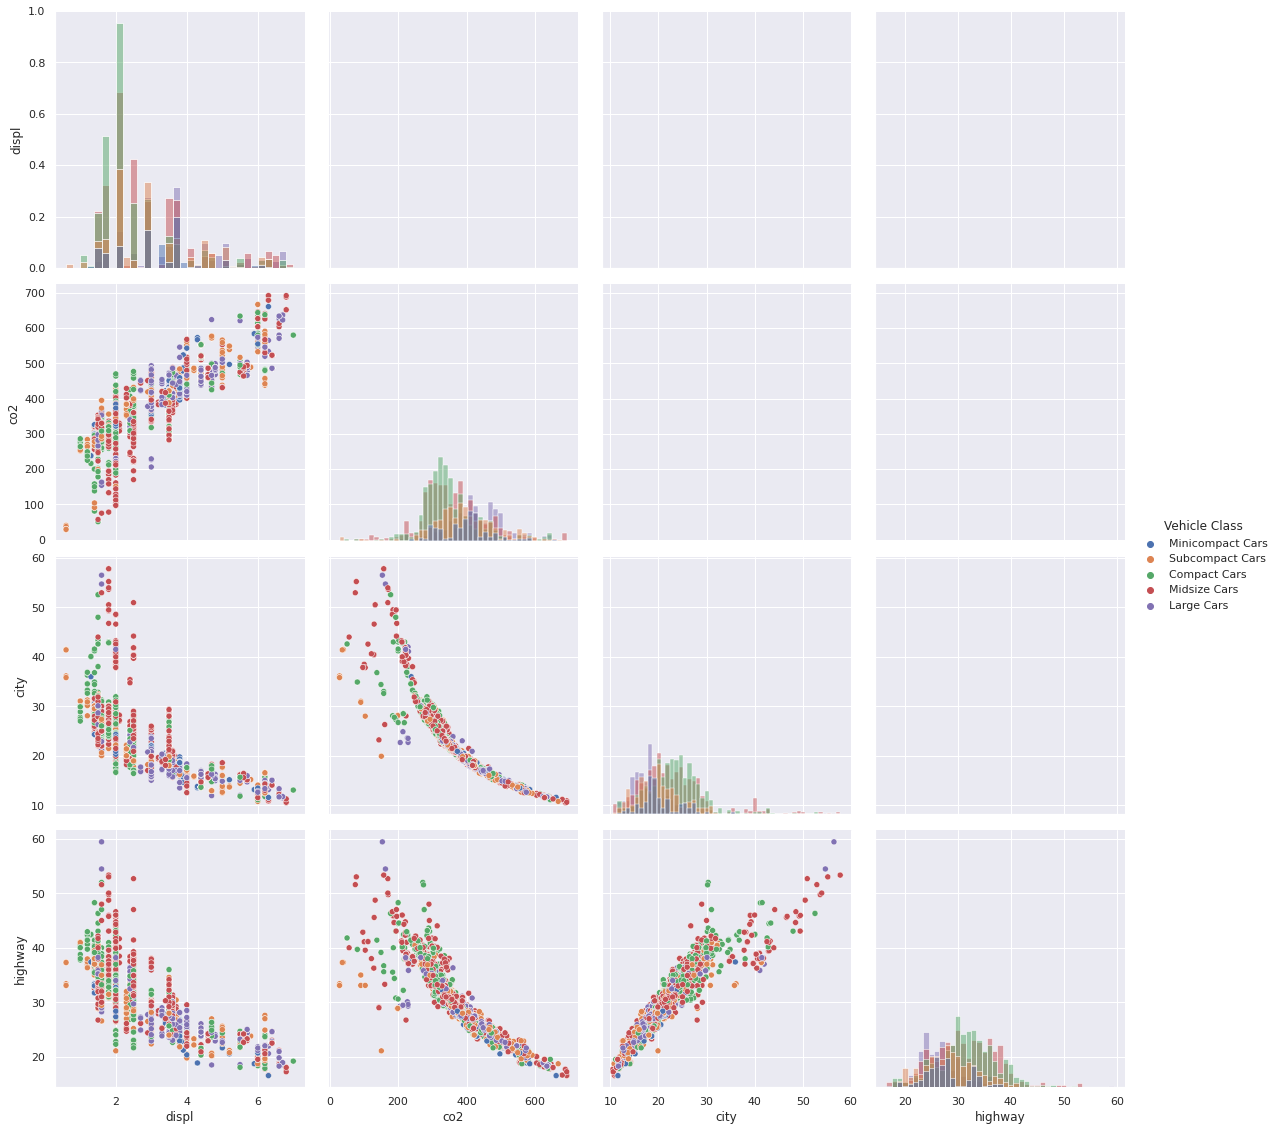

In [52]:
sns.set(rc={"figure.figsize":(15, 15)}) 
g = sns.PairGrid(data = fuel, hue = "VClass", height = 4, vars= ['displ', 'co2', 'city', 'highway'])
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.add_legend(title= "Vehicle Class")


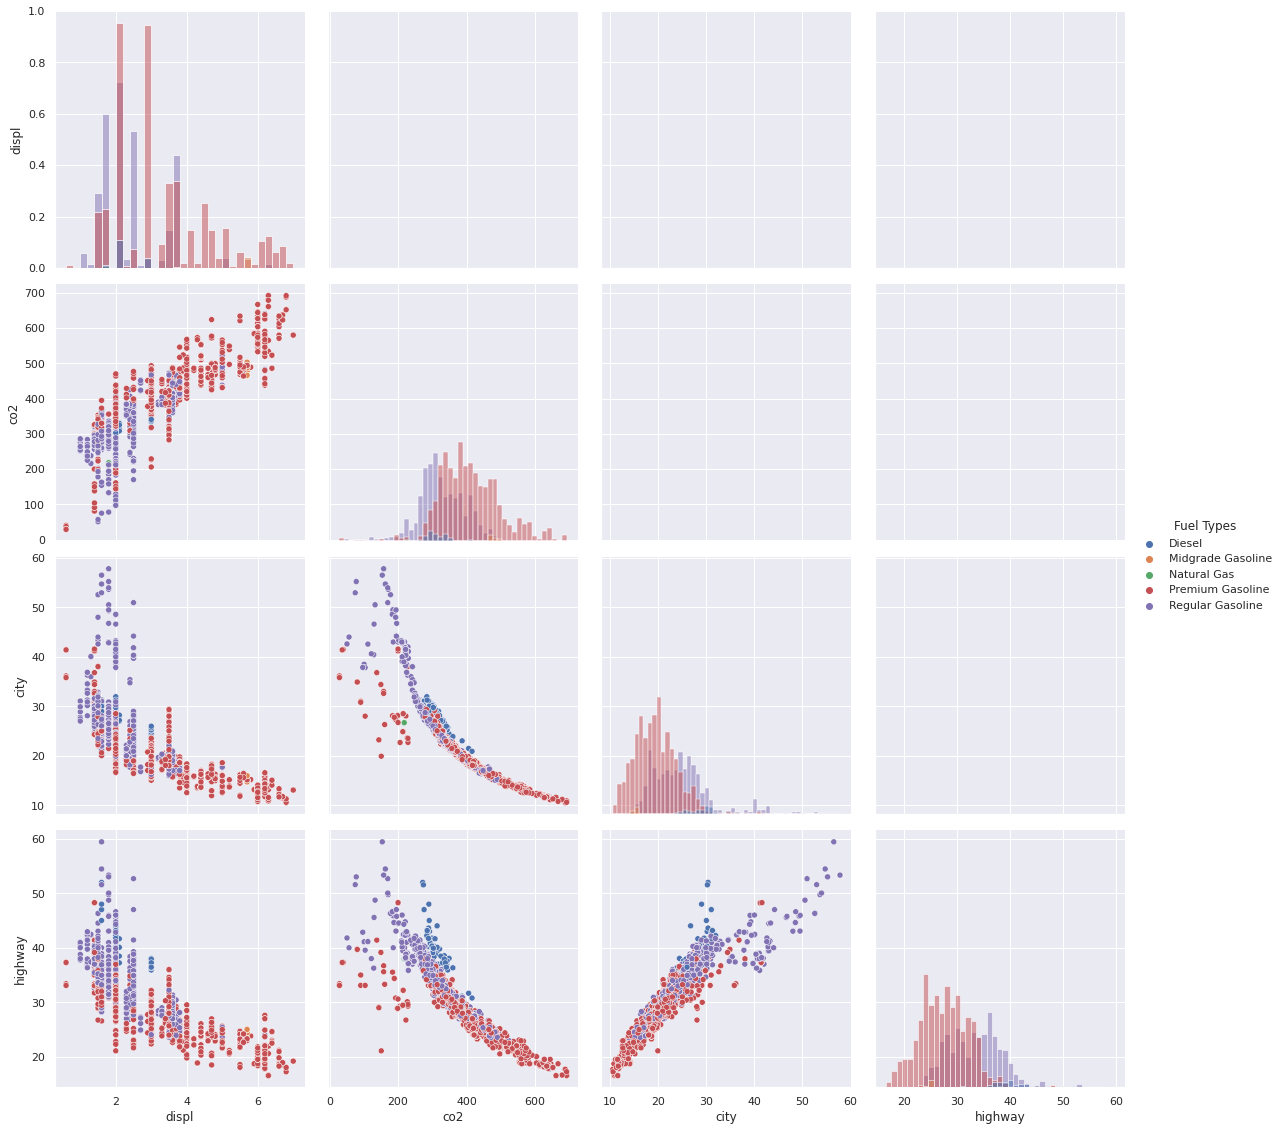

In [55]:
sns.set(rc={"figure.figsize":(15, 15)}) 
g = sns.PairGrid(data = fuel, hue = "fuelType", height = 4, vars= ['displ', 'co2', 'city', 'highway'])
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.add_legend(title= "Fuel Types")


TODO: add summary of findings

In [28]:
fuel.VClass.unique()


array(['Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars',
       'Minicompact Cars'], dtype=object)

In [42]:
fuel.cylinders.unique()

array([ 6,  4,  8, 12,  5,  3,  2])

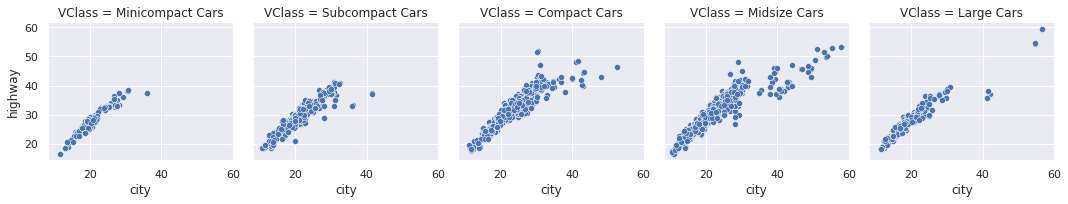

In [65]:
g = sns.FacetGrid(data = fuel, col = 'VClass')
g.map(sns.scatterplot, "city", "highway")

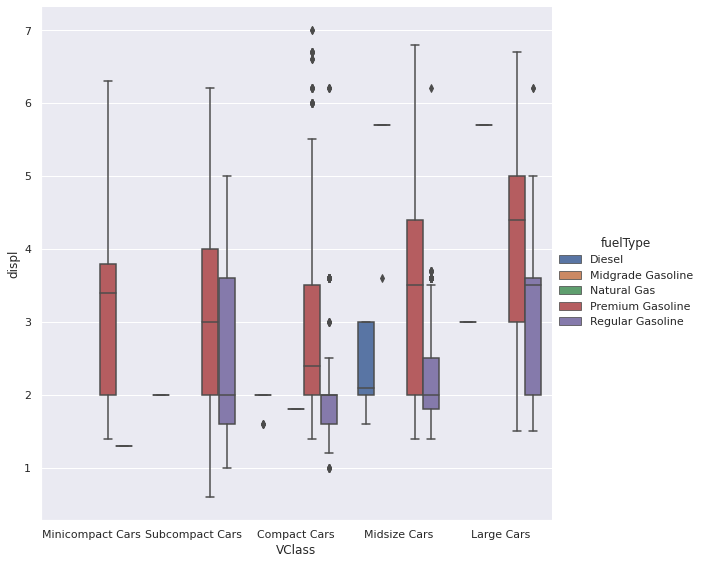

In [73]:
sns.catplot(x="VClass", y="displ", kind="box", data=fuel, hue = 'fuelType', height= 8)

# the data size of non-premium gasoline is sparse so I will consider whether is fuel is premium or not

AttributeError: 'Legend' object has no attribute 'fontsize'

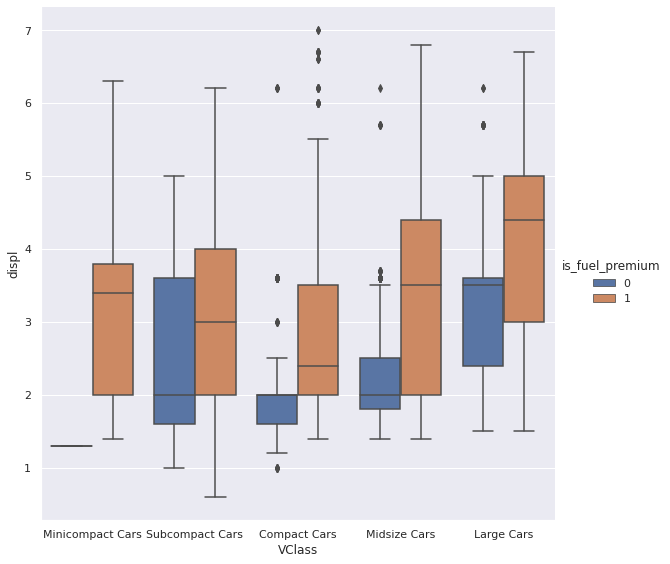

In [102]:
fuel['is_fuel_premium'] = pd.get_dummies(fuel.fuelType)['Premium Gasoline']

g = sns.catplot(x="VClass", y="displ", kind="box", data=fuel, hue = 'is_fuel_premium', height= 8)


The plot suggest that displacement is higher when using premium gasoline. Generally, engine size increases as the vehicle is larger, but a lot of variance for small cars such as minicompact and subcompact cars.

<AxesSubplot:xlabel='VClass', ylabel='count'>

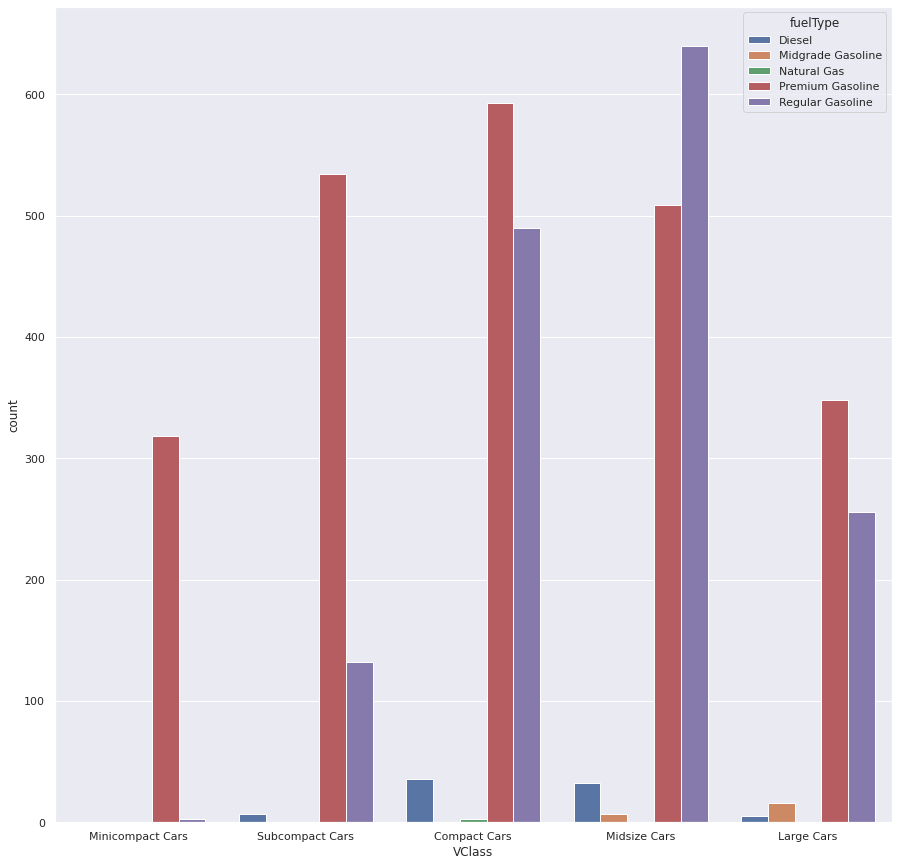

In [90]:
sns.countplot(data = fuel, x = 'VClass', hue = 'fuelType')